In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')

%matplotlib inline
sns.set(style='whitegrid')

In [ ]:
data_path = '/content/Economic Indicators And Inflation (1) (1).csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')
df.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


In [ ]:
df.columns = [col.strip() for col in df.columns]

print('Columns after cleaning:', df.columns.tolist())

print('Missing values in each column:')
print(df.isnull().sum())

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print('Duplicate rows:', df.duplicated().sum())

Columns after cleaning: ['Country', 'Year', 'GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Economic Growth (%)']
Missing values in each column:
Country                  0
Year                     0
GDP (in billion USD)     0
Inflation Rate (%)       0
Unemployment Rate (%)    0
Economic Growth (%)      0
dtype: int64
Duplicate rows: 0


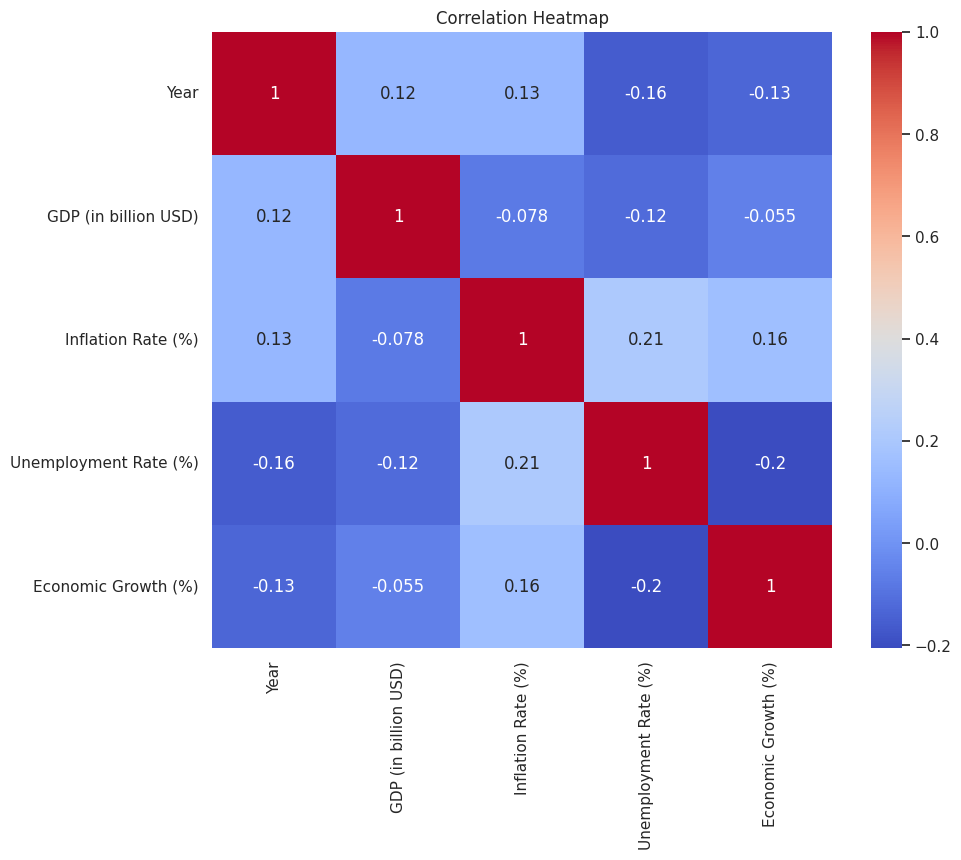

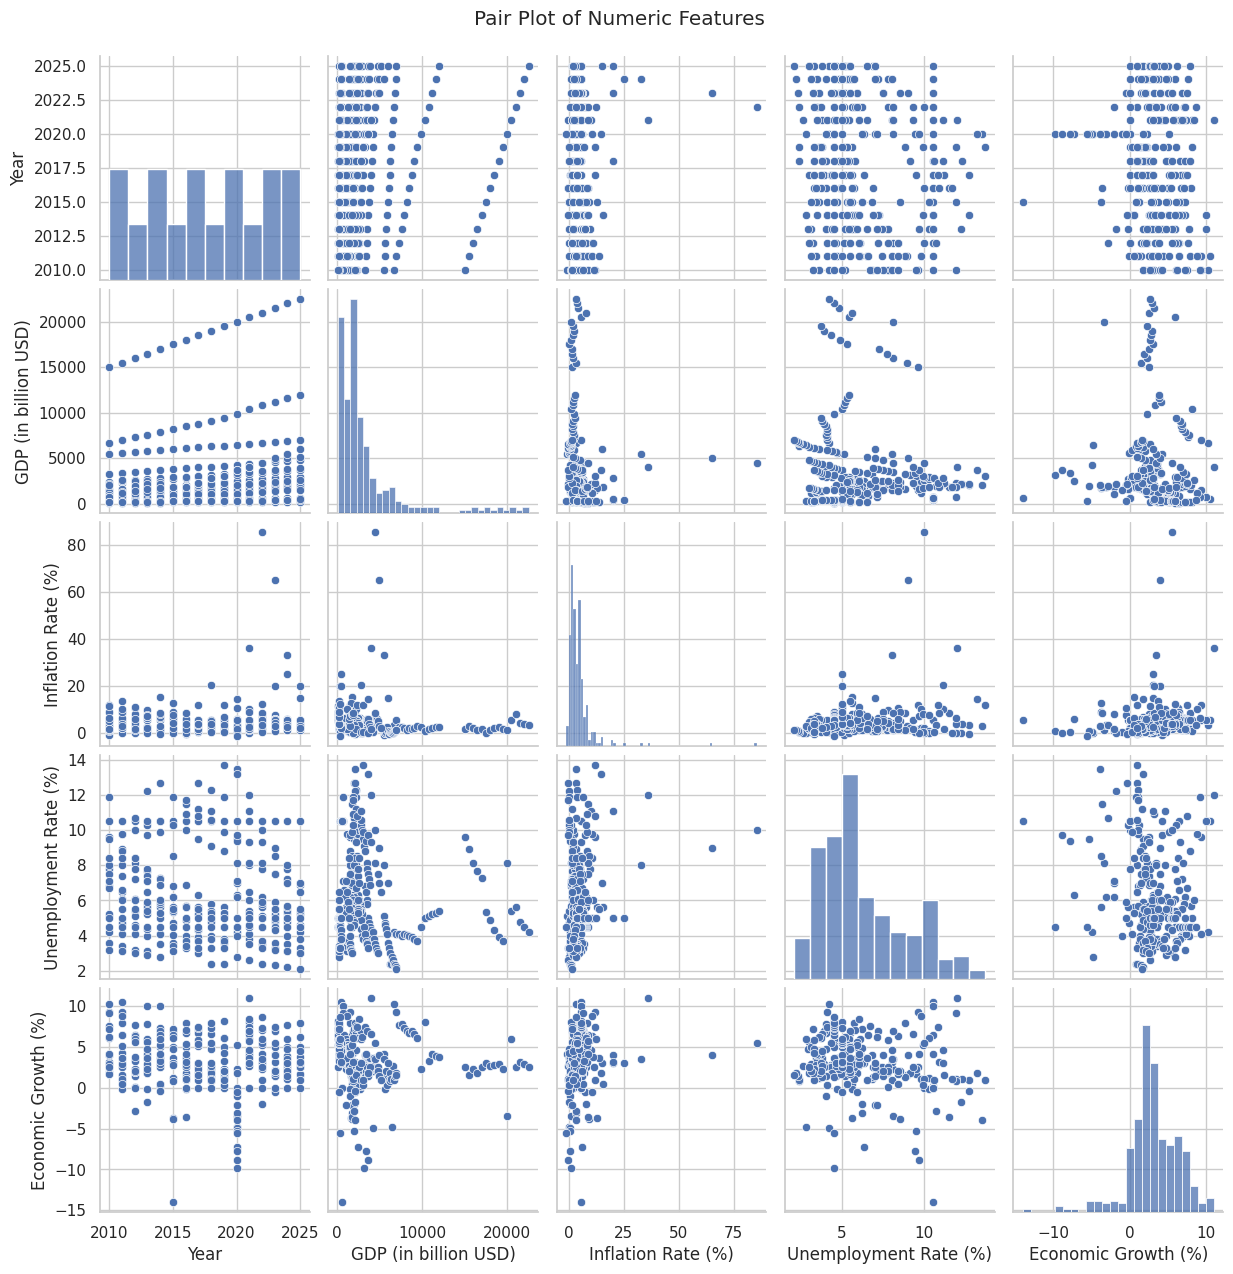

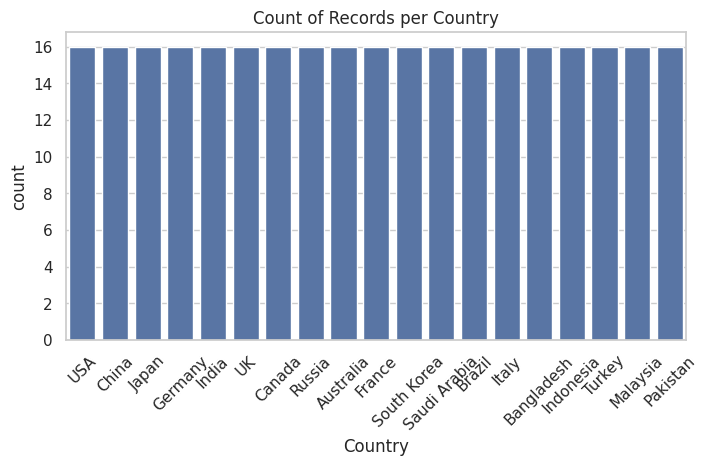

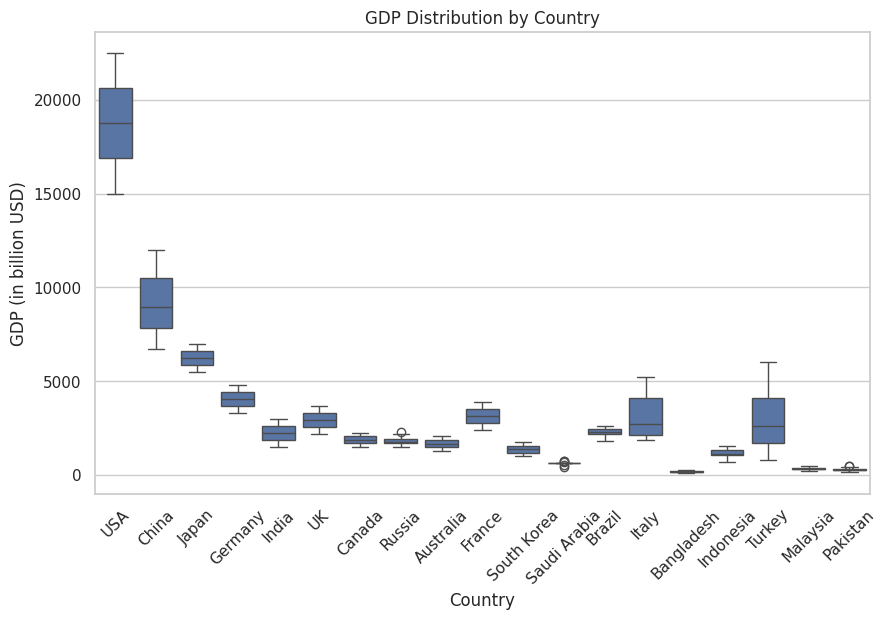

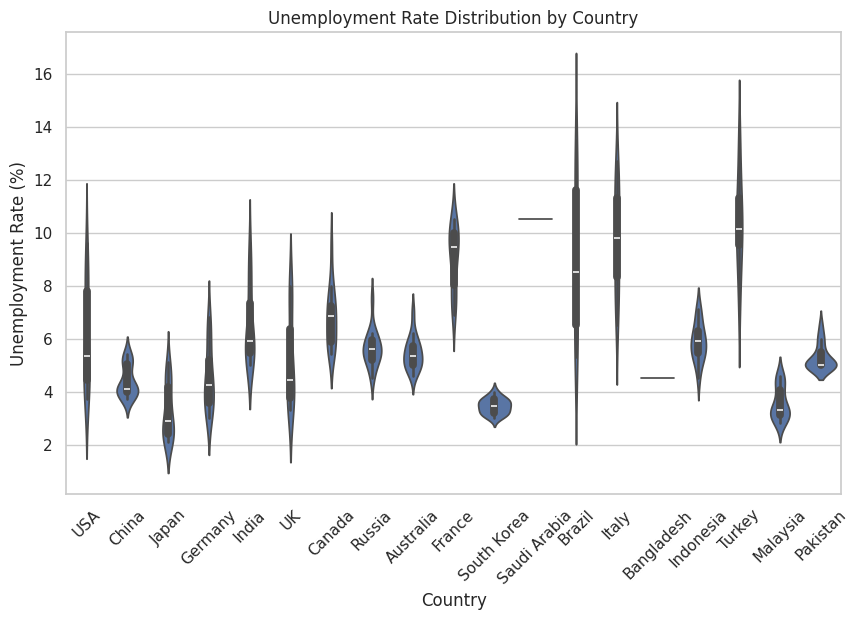

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
  plt.figure(figsize=(10, 8))
  corr = numeric_df.corr()
  sns.heatmap(corr, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

sns.pairplot(numeric_df.dropna())
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Country')
plt.title('Count of Records per Country')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='GDP (in billion USD)')
plt.title('GDP Distribution by Country')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Country', y='Unemployment Rate (%)')
plt.title('Unemployment Rate Distribution by Country')
plt.xticks(rotation=45)
plt.show()

R2 score of the Linear Regression model: 0.0761


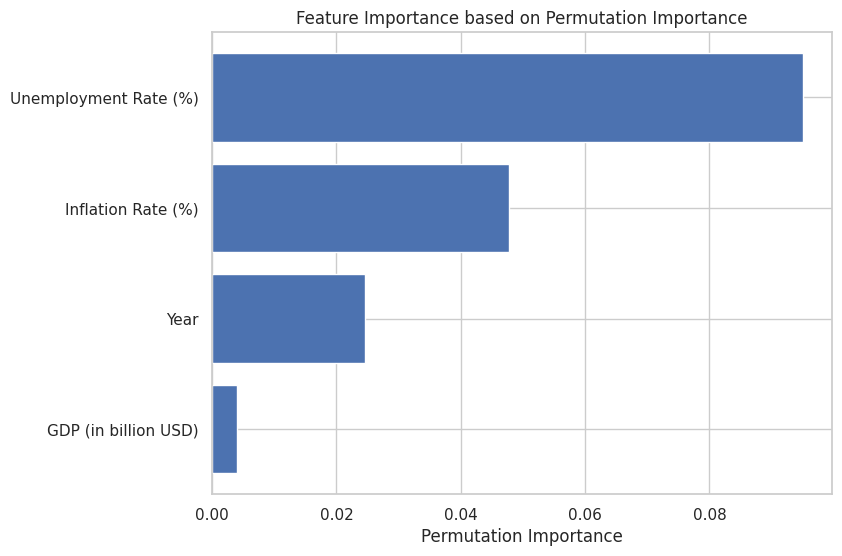

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

features = df[['GDP (in billion USD)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Year']]
target = df['Economic Growth (%)']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 score of the Linear Regression model: {score:.4f}")
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance based on Permutation Importance')
plt.show()